In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#here we have read the csv file
readcsv = pd.read_csv("/content/drive/MyDrive/Concept of technology and AI/Crop_Recommendation.csv")
# converted the datset into Dataframe
df = pd.DataFrame(readcsv)
df



,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


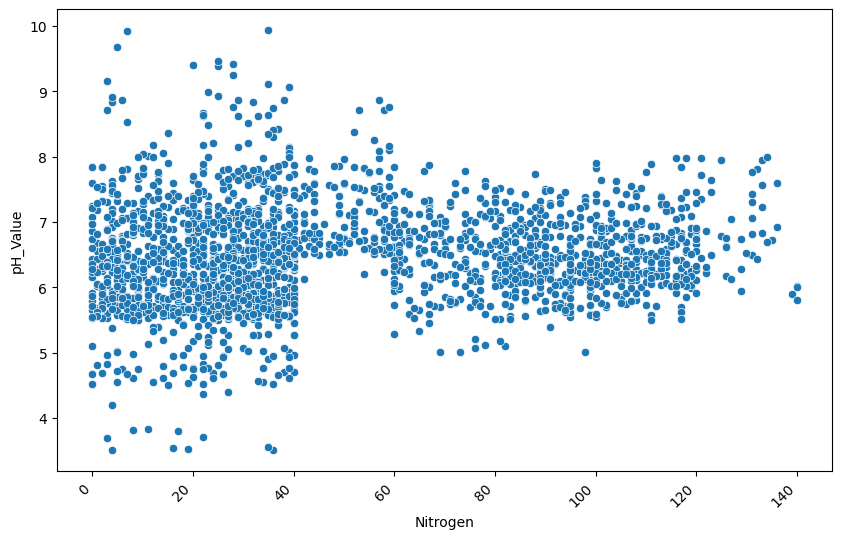

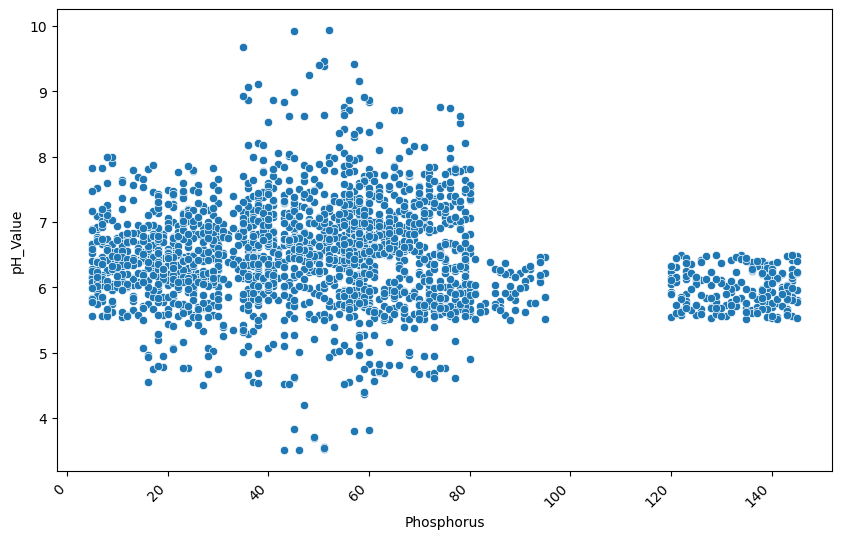

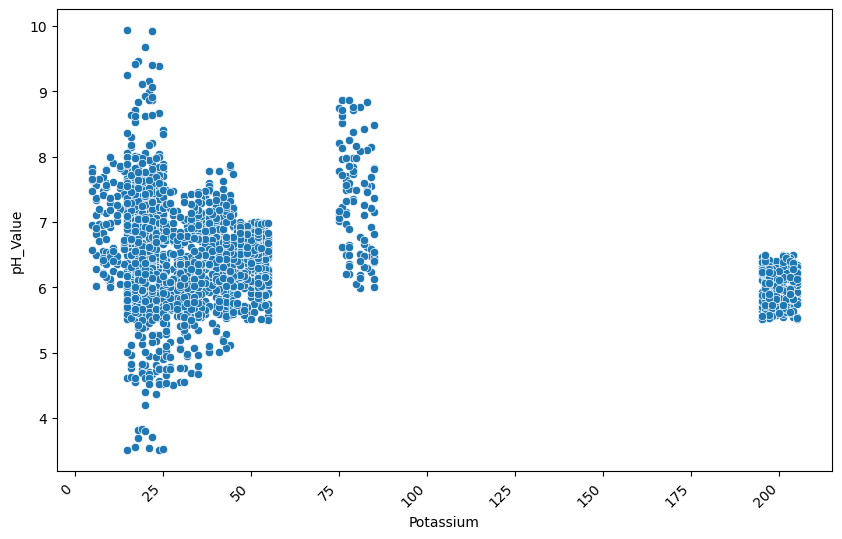

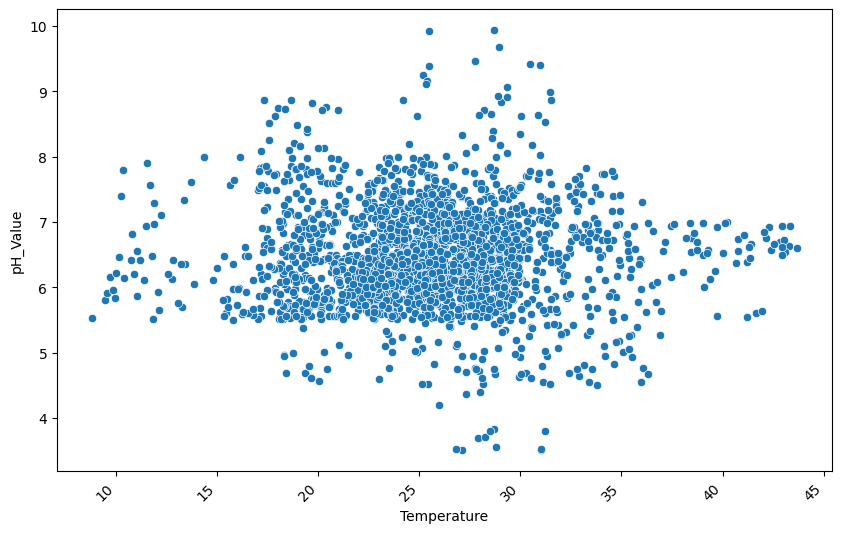

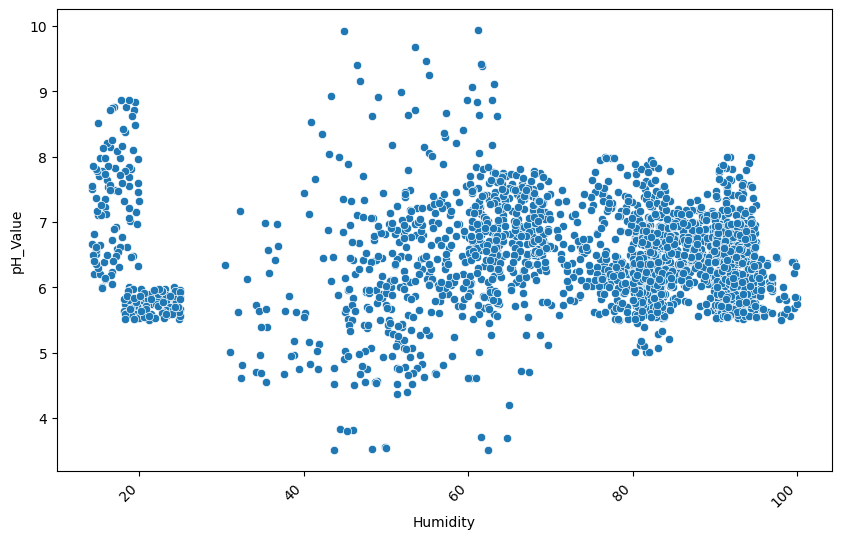

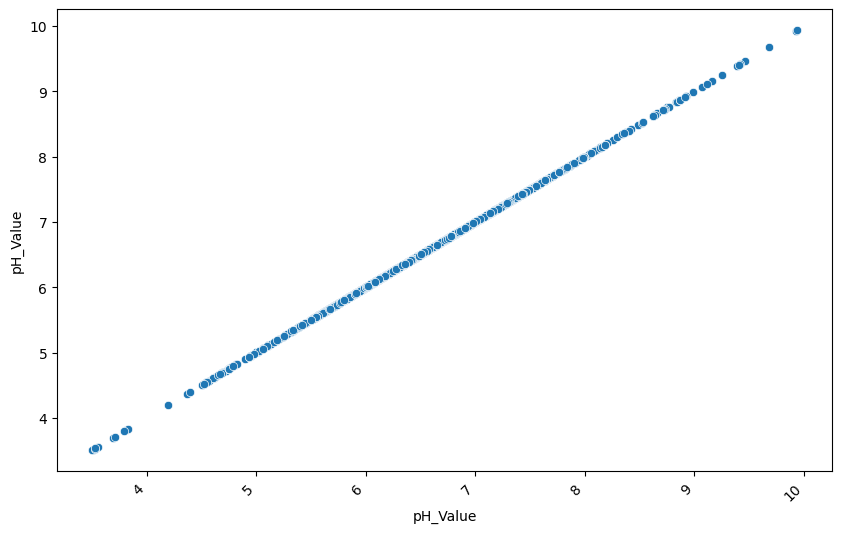

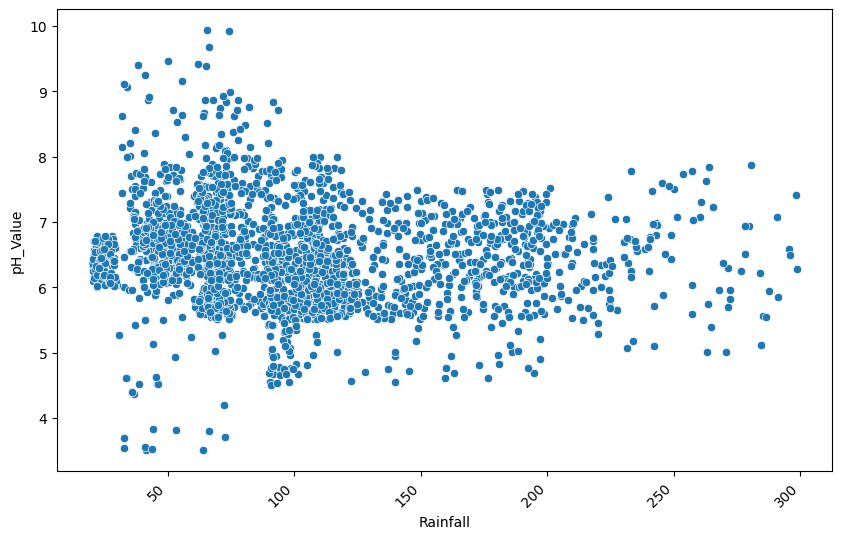

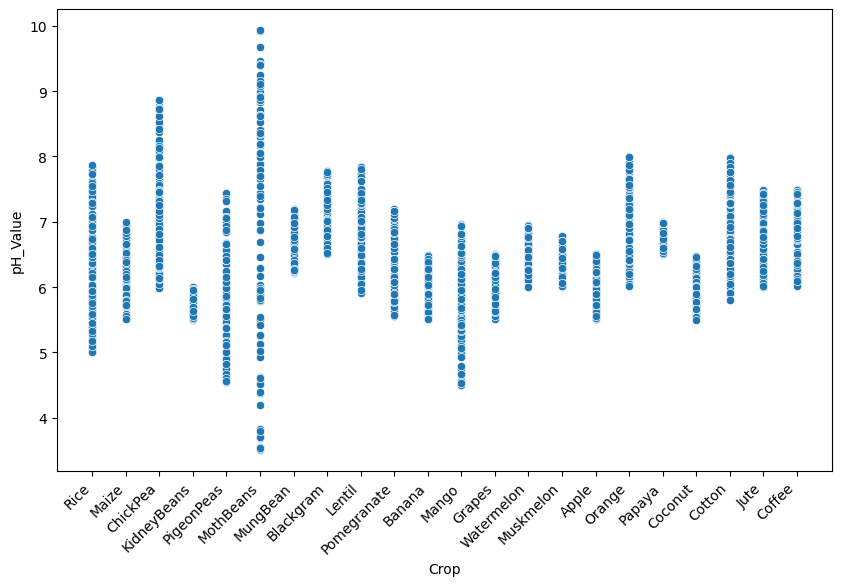

In [7]:
# scatter plots
cols = df.columns
for col in cols:
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=col,y='pH_Value',data=df)
  plt.xticks(rotation=45, ha='right')
plt.show()

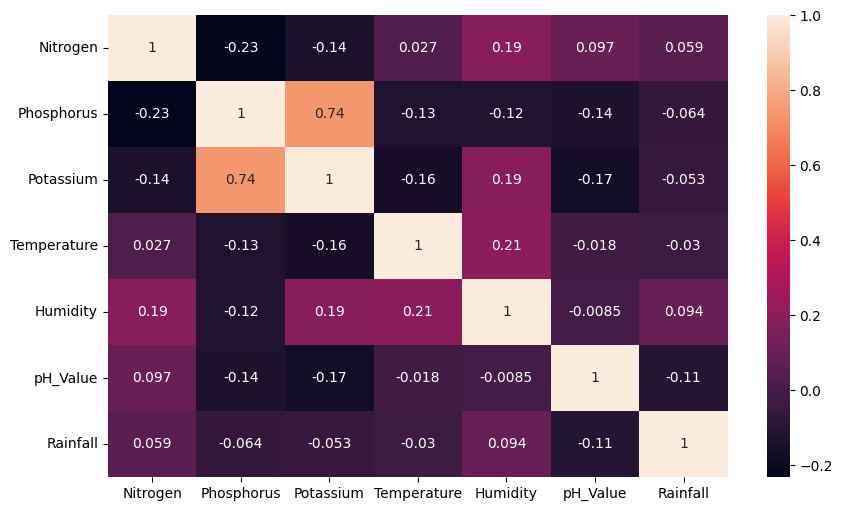

In [9]:
# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True) # Select only numerical columns for correlation
plt.show()

In [102]:
rows,columns =df.shape
print(f"Rows in the dataset:{rows} Columns in the dataset:{columns}")

Rows in the dataset:2200 Columns in the dataset:8


In [103]:
# Finding whether there are missing values or not in the datasets
df.isnull().sum()

,0
Nitrogen,0
Phosphorus,0
Potassium,0
Temperature,0
Humidity,0
pH_Value,0
Rainfall,0
Crop,0


Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')


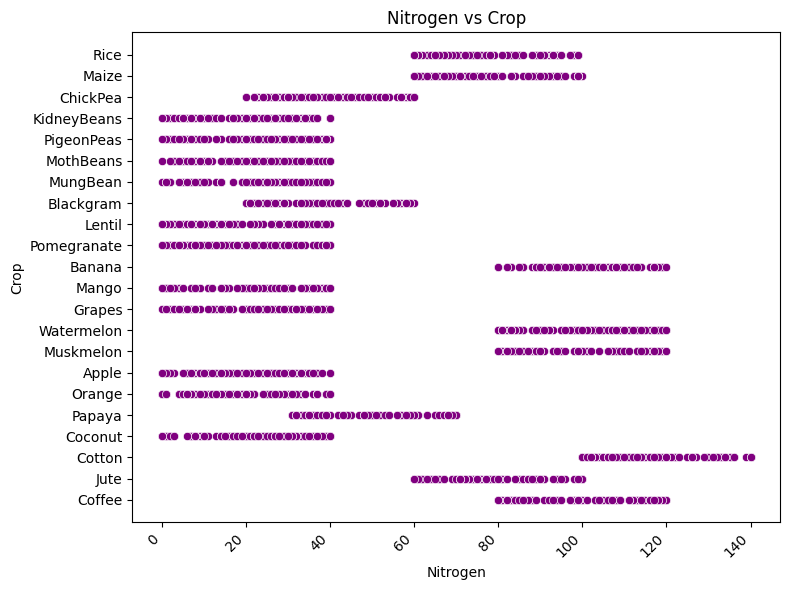

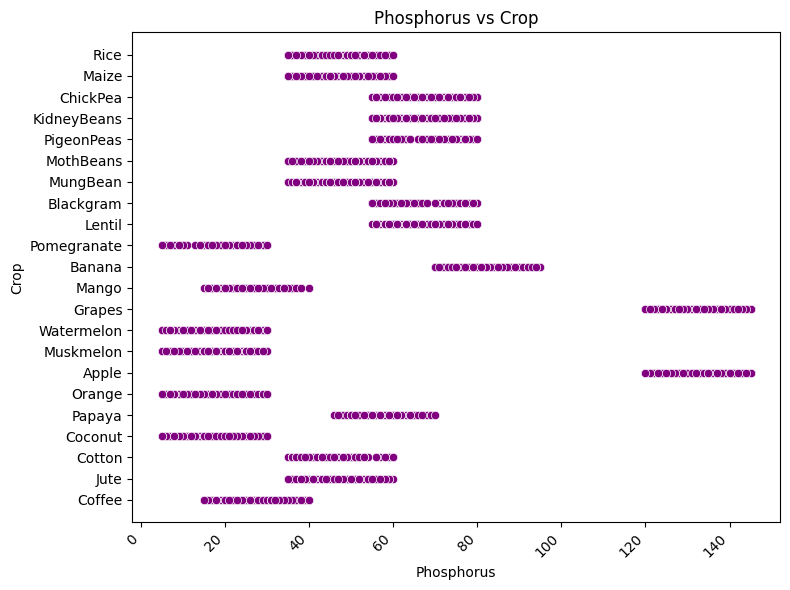

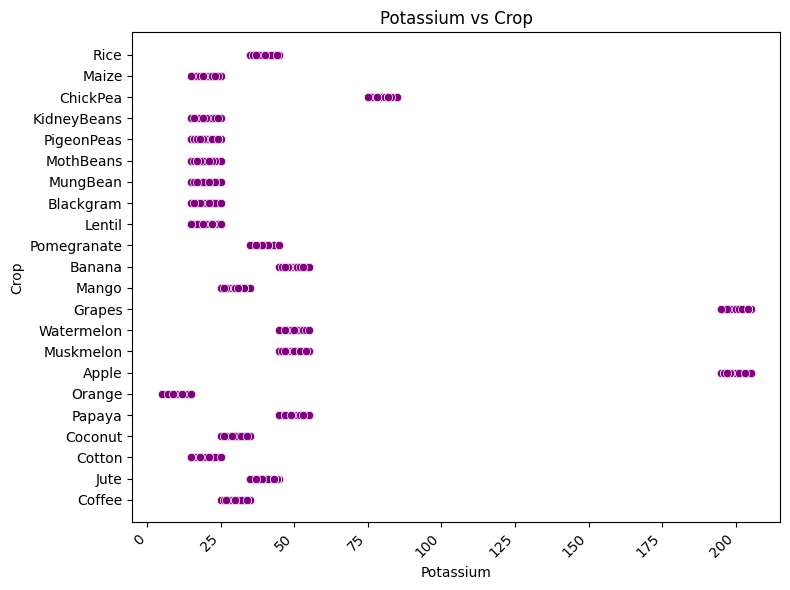

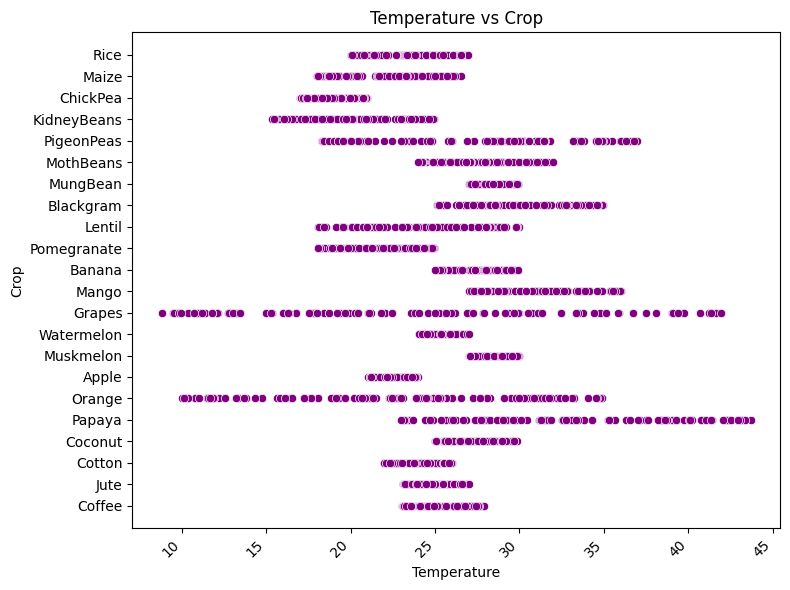

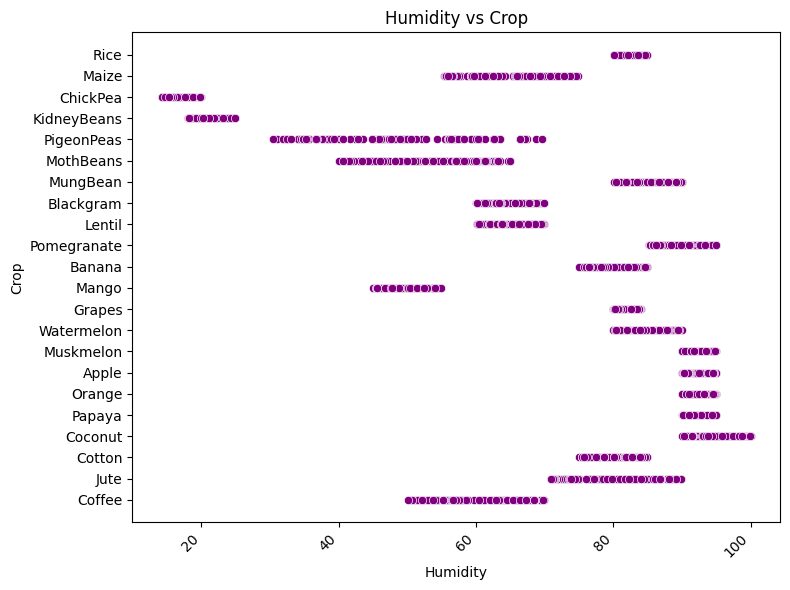

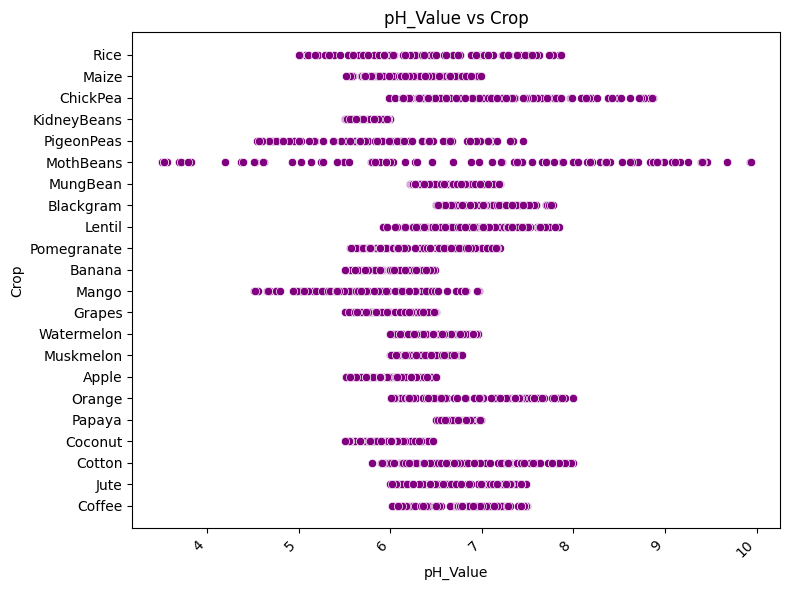

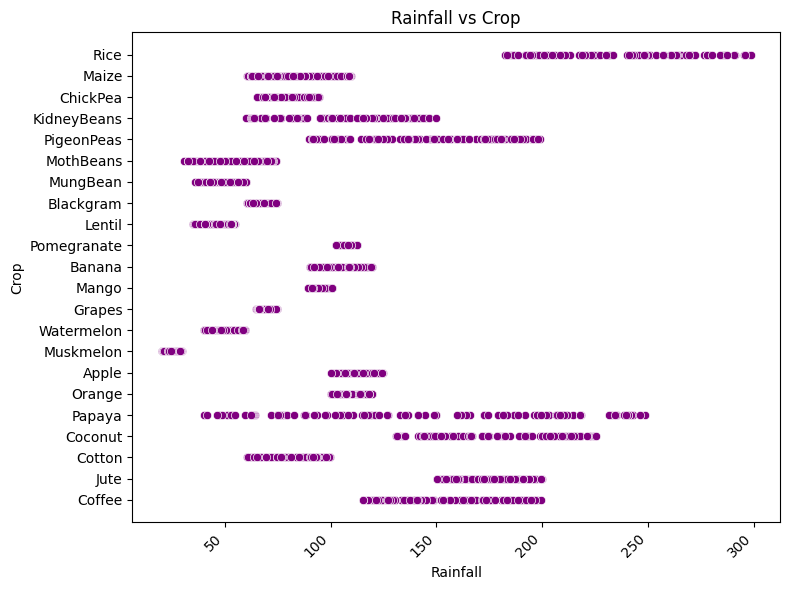

In [104]:
# Data Visualization Part
# Scatter plot using 'Crop' as the target variable
col_values = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

# Assign df to df_filtered (or apply any filtering here if needed)
df_filtered = df

# Print the actual column names in your DataFrame
print(df_filtered.columns)

target_column = 'Crop'  # Set 'Crop' as the target variable

for col in col_values:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.scatterplot(x=df_filtered[col], y=df_filtered[target_column], data=df_filtered, color='purple')
    plt.title(f'{col} vs {target_column}')
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

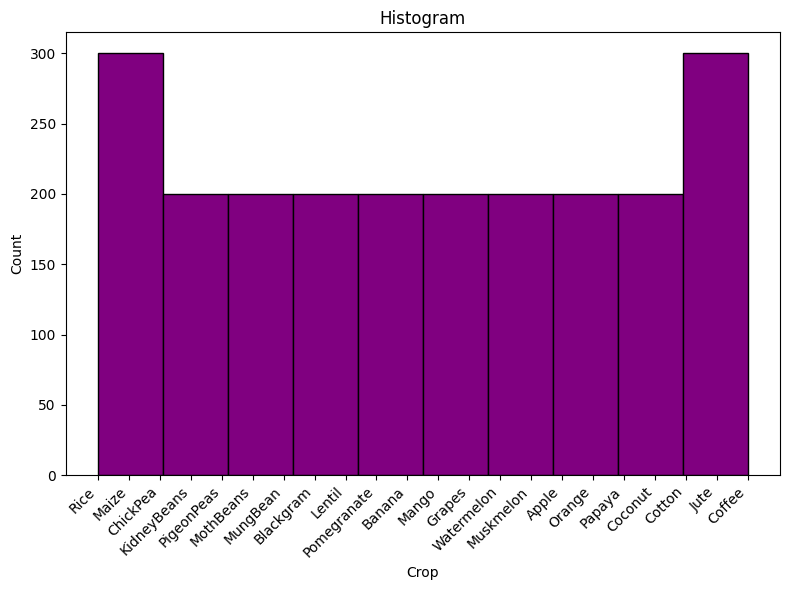

In [105]:
# Histogramm for Average Temperature
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['Crop'] ,bins=10, color='purple',edgecolor='black')
plt.xlabel('Crop')
plt.ylabel('Count')# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

plt.xticks(rotation=45, ha='right')
plt.title('Histogram')
plt.tight_layout()
plt.show()

In [107]:
# Splitting the datas for training and testing purpose
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
def train_test_split_custom(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    train_indices = indices[test_size:]
    test_indices=indices[:test_size]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test
    # Assuming 'Crop' is the target variable and the rest are features
X = df.drop('Crop', axis=1).values  # Features
y = df['Crop'].values  # Target variable
# Initialize LabelEncoder
label_encoder = LabelEncoder() # Now LabelEncoder is defined

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_seed=42)

Iteration 0: Cost = 2.8621
Iteration 100: Cost = 0.7482
Iteration 200: Cost = 0.5301
Iteration 300: Cost = 0.4747
Iteration 400: Cost = 0.4376
Iteration 500: Cost = 0.4064
Iteration 600: Cost = 0.3793
Iteration 700: Cost = 0.3559
Iteration 800: Cost = 0.3355
Iteration 900: Cost = 0.3178


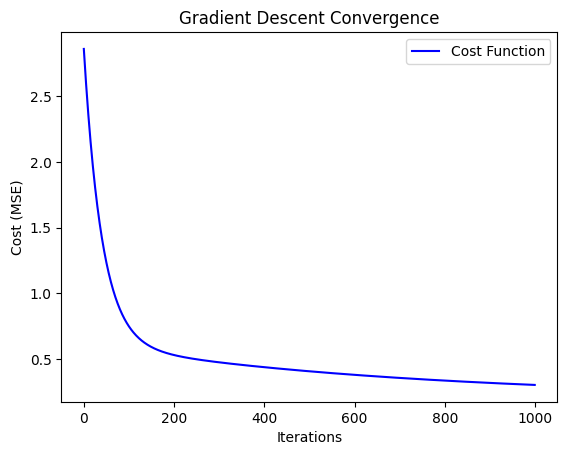

In [108]:

# Example dataset (replace with actual data)
np.random.seed(42)
X_train = np.random.rand(100, 1).astype(float)  # Ensure X_train is float
y_train = (3 * X_train.squeeze() + np.random.randn(100) * 0.5).astype(float)  # Ensure y_train is float

# Initialize parameters
n_samples, n_features = X_train.shape
weights = np.zeros(n_features, dtype=float)  # Ensure weights are float
bias = 0.0  # Ensure bias is float

# Training parameters
learning_rate = 0.01
num_iterations = 1000

# Cost Function
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training the model
cost_history = []
for i in range(num_iterations):
    y_pred = np.dot(X_train, weights) + bias  # Prediction
    dw = (1 / n_samples) * np.dot(X_train.T, (y_pred - y_train))  # Gradient of weights
    db = (1 / n_samples) * np.sum(y_pred - y_train)  # Gradient of bias
    weights -= learning_rate * dw  # Update weights
    bias -= learning_rate * db  # Update bias
    cost = cost_function(y_train, y_pred)  # Compute cost
    cost_history.append(cost)
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")
# Plot cost history
plt.plot(range(len(cost_history)), cost_history, label='Cost Function', color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()




In [109]:

# Example dataset (Replace with real data)
np.random.seed(42)
X_train = np.random.rand(440, 7)  # 440 samples, 7 features
y_train = np.random.rand(440)  # 440 target values
X_test = np.random.rand(100, 7)  # 100 samples, same 7 features

# Initialize weights correctly
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0.0

# Define prediction function
def predict(X, weights, bias):
    return np.dot(X, weights) + bias
# Make predictions
y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)


# Ensure correct shapes
print("y_train shape:", y_train.shape)  # Should be (440,)
print("y_pred_train shape:", y_pred_train.shape)  # Should be (440,)
print("y_test shape:", y_test.shape)  # Should be (100,)
print("y_pred_test shape:", y_pred_test.shape)  # Should be (100,)



y_train shape: (440,)
y_pred_train shape: (440,)
y_test shape: (440,)
y_pred_test shape: (100,)


In [110]:
# Evaluation metrices
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [111]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [112]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [113]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [141]:
print(f"Linear Regression from Scratch - Train MSE: {mse_train:.4f}, Mean Absolute Error: {mae_train:.4f}, Train RMSE: {rmse_train:.4f}, Train R²: {r2_train:.4f}")
print(f"Linear Regression from Scratch - Test MSE: {mse_test:.4f}, Mean Absolute Error: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}, Test R²: {r2_test:.4f}")

Linear Regression from Scratch - Train MSE: 150.8926, Mean Absolute Error: 0.5038, Train RMSE: 0.5798, Train R²: -3.0817
Linear Regression from Scratch - Test MSE: 0.3286, Mean Absolute Error: 0.5029, Test RMSE: 0.5732, Test R²: -3.3419


### USING PRE BUILT IN LIBRABRIES

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

In [117]:
# Step 1: Load the dataset
readcsv = pd.read_csv("/content/drive/MyDrive/Concept of technology and AI/Crop_Recommendation.csv")
df = pd.DataFrame(readcsv)

In [118]:
# Step 3: Build and evaluate two models

# Model 1: Linear Regression
lr_model = LinearRegression()

In [119]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)


In [120]:
# Fit and evaluate both models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [121]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [122]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [128]:
# Check dimensions of y_test and X_test before splitting
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X: (2200, 7)
Shape of y: (2200,)
Shape of X_train: (1760, 7)
Shape of X_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


In [134]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_test (and y_train if needed)
y_test_encoded = label_encoder.fit_transform(y_test)

# Now evaluate the Linear Regression model
mse_lr, mae_lr, rmse_lr, r2_lr = evaluate_model(y_test_encoded, y_pred_lr)

# Print the results
print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")



Linear Regression - MSE: 105.44228508481558, MAE: 8.524020880465777, RMSE: 10.268509389624942, R²: -1.4913165876979009


In [63]:
# Evaluate Random Forest
mse_rf, mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

In [64]:
# Print Evaluation Results
print(f"Linear Regression - MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

Linear Regression - MSE: 0.0782, MAE: 0.2328, RMSE: 0.2796, R²: -0.0334
Random Forest - MSE: 0.0771, MAE: 0.2318, RMSE: 0.2777, R²: -0.0188


In [65]:
# Step 4: Hyperparameter Optimization with GridSearchCV

# Hyperparameters for Linear Regression (None, as it doesn't have many hyperparameters)
lr_params = {}

In [66]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [70]:
# Best parameters for Random Forest
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [71]:
# Step 5: Feature Selection using SelectKBest
# Use SelectKBest with f_regression to select the top k features
select_k_best = SelectKBest(f_regression, k=5)  # You can adjust 'k' based on your needs
X_train_selected = select_k_best.fit_transform(X_train, y_train)
X_test_selected = select_k_best.transform(X_test)

In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Example DataFrame (Replace with your actual data)
df = pd.DataFrame({
    'Nitrogen': [10, 20, 30, 40, 50],
    'Phosphorus': [15, 25, 35, 45, 55],
    'Potassium': [5, 10, 15, 20, 25],
    'Temperature': [30, 32, 34, 36, 38],
    'Humidity': [80, 85, 90, 95, 100],
    'pH_Value': [6.5, 6.8, 7.0, 7.2, 7.5],
    'Rainfall': [100, 120, 140, 160, 180],
    'Crop': [0, 1, 0, 1, 0]
})

# Custom Train-Test Split function
def train_test_split_custom(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    train_indices = indices[test_size:]
    test_indices = indices[:test_size]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]  # Use .iloc to keep column information
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

# Separate features and target
X = df.drop('Crop', axis=1)  # Using the specified features for X
y = df['Crop'].values  # Target variable 'crop'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable (if it's categorical)
y_encoded = label_encoder.fit_transform(y)

# Split data using the custom function
X_train, X_test, y_train, y_test = train_test_split_custom(X, y_encoded, test_size=0.2, random_seed=42)

# Feature selection using SelectKBest
select_k_best = SelectKBest(score_func=f_classif, k=5)  # Selecting 5 best features
X_train_selected = select_k_best.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[select_k_best.get_support()]  # Now you can access the selected columns
print(f"Selected features: {selected_features}")


Selected features: Index(['Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Rainfall'], dtype='object')


In [83]:
# Step 6: Rebuild Models using Optimal Hyperparameters and Selected Features
# Linear Regression model remains the same
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

LinearRegression()

In [84]:
# Random Forest with the best hyperparameters and selected features
rf_model_selected = RandomForestRegressor(n_estimators=rf_grid_search.best_params_['n_estimators'],
                                          max_depth=rf_grid_search.best_params_['max_depth'],
                                          min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                          min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
                                          random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [85]:

# Predictions
y_pred_lr_selected = lr_model_selected.predict(X_test_selected)
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)

In [99]:
# Ensure predictions and y_test are 1D arrays
y_test = y_test.flatten()
y_pred_lr_selected = y_pred_lr_selected.flatten()
y_pred_rf_selected = y_pred_rf_selected.flatten()

# Evaluate the final models
mse_lr_final, mae_lr_final, rmse_lr_final, r2_lr_final = evaluate_model(y_test, y_pred_lr_selected)
mse_rf_final, mae_rf_final, rmse_rf_final, r2_rf_final = evaluate_model(y_test, y_pred_rf_selected)

# Print evaluation metrics for both models
print(f"Linear Regression: MSE={mse_lr_final}, MAE={mae_lr_final}, RMSE={rmse_lr_final}")
print(f"Random Forest: MSE={mse_rf_final}, MAE={mae_rf_final}, RMSE={rmse_rf_final}")


Linear Regression: MSE=2.011763722504319, MAE=1.418366568452711, RMSE=1.418366568452711
Random Forest: MSE=0.3201485235013975, MAE=0.5658166871888788, RMSE=0.5658166871888788


In [98]:
# Final evaluation
print(f"Final Linear Regression - MSE: {mse_lr_final:.4f}, MAE: {mae_lr_final:.4f}, RMSE: {rmse_lr_final:.4f}")
print(f"Final Random Forest - MSE: {mse_rf_final:.4f}, MAE: {mae_rf_final:.4f}, RMSE: {rmse_rf_final:.4f}")

# Step 7: Conclusion
# Analyze the results, compare both models, and discuss the effect of cross-validation, hyperparameter tuning, and feature selection

Final Linear Regression - MSE: 2.0118, MAE: 1.4184, RMSE: 1.4184
Final Random Forest - MSE: 0.3201, MAE: 0.5658, RMSE: 0.5658
